In [260]:
# The Aim of this Project is to find the correlation and its strength between two variables
# Make a visualisation

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [262]:
df = pd.read_csv("movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [263]:
# Removing dupplicate values

df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [264]:
# Checking if there is a missing value

df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [265]:
# Filling the Numerical Data with their median and the categorical Data with their categorical words

df['rating'] = df['rating'].fillna(method = 'pad')
df['released'] = df['released'].fillna(method = 'pad')
df['score'] = df['score'].fillna(method = 'pad')
df['votes'] = df['votes'].fillna(method = 'pad')
df['writer'] = df['writer'].fillna(method = 'pad')
df['star'] = df['star'].fillna(method = 'pad')
df['country'] = df['country'].fillna(method = 'pad')
df['company'] = df['company'].fillna(method = 'pad')
df['runtime'] = df['runtime'].fillna(method = 'pad')
df['budget'] = df['budget'].fillna(df['budget'].median())
df['gross'] = df['gross'].fillna(df['gross'].median())
df['company'] = df['company'].fillna(method = 'pad')

In [266]:
# Now observe that the Data has being cleaned

df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [267]:
# Checking the type of of Data we have in our Data Set

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [268]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [193]:
# We want to convert some numerical Data types that is float into intergers that is whole numbers

df["votes"] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['score'] = df['score'].astype('int64')

# Checking what we've done

In [194]:
df.dtypes

name        object
rating      object
genre       object
year         int64
released    object
score        int64
votes        int64
director    object
writer      object
star        object
country     object
budget       int64
gross        int64
company     object
runtime      int64
dtype: object

In [195]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [196]:
# I want to extract only the month from the released column.

df[['Month', 'Country']] = df['released'].str.split(',', 1, expand = True)

In [197]:
# Haven done that, lets see the effect

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Month,Country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,June 13,1980 (United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,July 2,1980 (United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,June 20,1980 (United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,July 2,1980 (United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,July 25,1980 (United States)


In [198]:
# I want to remove some column

df = df.drop(columns = ['name', 'rating', 'released', 'Country', 'country', 'company', 'genre'], axis = 0)

In [199]:
df.head()

,year,score,votes,director,writer,star,budget,gross,runtime,Month
0,1980,8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,19000000,46998772,146,June 13
1,1980,5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000,58853106,104,July 2
2,1980,8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000,538375067,124,June 20
3,1980,7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,3500000,83453539,88,July 2
4,1980,7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000,39846344,98,July 25


#### Visualisation

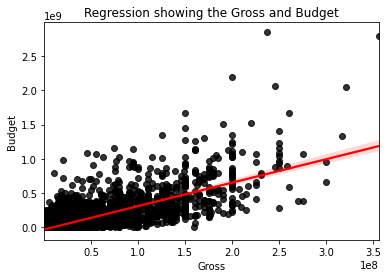

In [201]:
sns.regplot(x = 'budget', y = 'gross', data = df,scatter_kws = {'color':'black'},line_kws = {'color':'red'})
plt.title('Regression showing the Gross and Budget')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.show()

#### Correlation

In [202]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.096306,0.222427,0.291690,0.259504,0.120694
score,0.096306,1.000000,0.393174,0.057332,0.176697,0.382605
votes,0.222427,0.393174,1.000000,0.461021,0.632125,0.309140
budget,0.291690,0.057332,0.461021,1.000000,0.745881,0.273410
gross,0.259504,0.176697,0.632125,0.745881,1.000000,0.244323
runtime,0.120694,0.382605,0.309140,0.273410,0.244323,1.000000


### From the visualisation of the heatmap, we discover that;
1. There is a relationship between budget and that of the gross
2. We saw the strength of their relation which is 0.75, which has a positive relation.
3. There is another relationship which is that of the votes and gross

#### There are three types of correlation
1. kendall
2. pearson
3. spearman

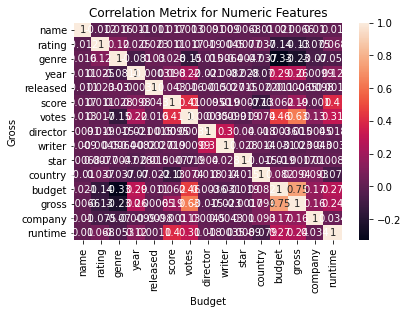

In [285]:
# Using visualisation on the correlation

correlation = df.corr(method = 'pearson')
sns.heatmap(correlation, annot = True)
plt.title("Correlation Metrix for Numeric Features")
plt.xlabel("Budget")
plt.ylabel('Gross')
plt.show()

In [286]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [287]:
df_numerised = df

for col_name in df_numerised.columns:
    if df_numerised[col_name].dtype == 'object':
        df_numerised[col_name] = df[col_name].astype('category')
        df_numerised[col_name] = df[col_name].cat.codes
df_numerised

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,6,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,20205757.0,884,90.0
7664,1678,6,4,2020,1107,4.7,36.0,774,2614,1886,55,20500000.0,20205757.0,539,90.0
7665,4717,6,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,20205757.0,941,90.0
7666,2843,6,6,2020,2817,5.7,29.0,1184,1824,450,55,15000.0,20205757.0,941,120.0


In [288]:
correlation_mat = df_numerised.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name     name        1.000000
         rating     -0.011776
         genre       0.016355
         year        0.011453
         released   -0.010758
                       ...   
runtime  country    -0.078803
         budget      0.273410
         gross       0.244323
         company     0.033725
         runtime     1.000000
Length: 225, dtype: float64

#### Now we have succssesfuly founr the correlation and its strength